In [1]:
import numpy as np

In [2]:
# Load pretrained model (since intermediate data is not included, the model cannot be refined with additional data)
# emb = KeyedVectors.load_word2vec_format('/data/medg/misc/phuongpm/wikipedia-pubmed-and-PMC-w2v.bin', binary=True)

In [3]:
from util.util import *

In [4]:
path = '/crimea/phuongpm/tuned/squadv2_results_biobert/'

In [5]:
file = 'predictions_.json'

In [6]:
data = load_json(path+file)

In [7]:
count = {}
for a in data.values():
    if a != '':
        count[a] = count.get(a, 0) + 1

In [8]:
import matplotlib.pyplot as plt

In [9]:
pairs = []
ans = 0
for k, v in count.items():
    pairs.append((v, k))
    ans += v
    

In [10]:
pairs.sort(reverse=True)

In [11]:
pairs[:20]

[(65, 'treatment'),
 (24, 'disease'),
 (23, 'mri'),
 (17, 'mortality'),
 (16, 'symptoms'),
 (12, 'tuberculosis'),
 (11, 'surgery'),
 (11, 'malignancy'),
 (11, 'fever'),
 (10, 'tb'),
 (10, 'infection'),
 (9, 'ct'),
 (8, 'sarcoidosis'),
 (8, 'myxoedema coma'),
 (8, 'hiv'),
 (8, 'ecg'),
 (8, 'ct scan'),
 (7, 'vomiting'),
 (6, 'rash'),
 (6, 'portal hypertension')]

In [12]:
n_count = len(count)

In [13]:
stop = 20

In [14]:
def plotcommonword(pairs, stop=20):
    plotorder = list(range(stop, 0, -1))
    plt.figure(figsize=(8,6))
    plt.hlines(y=plotorder, xmin=0, xmax=[v for v, _ in pairs[:stop]], color='salmon')
    plt.plot([v for v, _ in pairs[:stop]], plotorder, "D", color = 'red')
    plt.yticks(plotorder, [k for _, k in pairs[:stop]])
    plt.xlabel('Count')
    plt.show()

In [15]:
wordlength = []
for k in count:
    wordlength.append((len(k.split()),k))
    

In [16]:
wordlength.sort(reverse=True)

In [17]:
import seaborn as sns

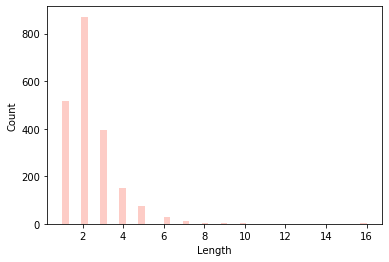

In [18]:
sns.distplot([l for l,_ in wordlength],kde=False, hist=True, color = 'salmon')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

In [21]:
truthdatapath = '/data/medg/misc/phuongpm/clicr_squad_v2_full/'

In [22]:
devfile = 'dev1.0.json'

In [23]:
truthdata = load_json(truthdatapath + devfile)

In [38]:
truepositive = [] #list of predicted correct answer
falsepositive = [] #list of predicted answer when truth answer is none
truenegative = 0 # count of predicted correct none answer
falsenegative = 0 # count of predicted error none answer
unmatching = [] # tuple of wrong prediction 
for datum in truthdata['data'][:1]:
    par = datum['paragraphs'][0]
    for qa in par['qas']:
        if qa['is_impossible']:
            truthanswer = ''
        else:
            truthanswer = qa['answers'][0]['text']
        predictedanswer = data[qa['id']]
        
        if truthanswer == predictedanswer:
            if truthanswer != '':
                truepositive.append(predictedanswer)
            else:
                truenegative += 1
        else:
            if truthanswer == '':
                falsepositive.append(predictedanswer)
            else:
                if predictedanswer == '':
                    
                falsenegative.append((truthanswer, predictedanswer))
                
    
    

In [39]:
truepositive

['caffey disease', 'infantile cortical hyperostosis', 'caffey disease']

In [40]:
falsepositive

['childhood bone swelling', 'other conditions']

In [41]:
falsenegative

[('systemic symptoms', ''),
 ('irritability', ''),
 ('fever', ''),
 ('soft - tissue swelling', ''),
 ('underlying cortical bone thickening', 'bone lesions')]